In [14]:
from graph_traffic.config import training_path, results_path
import pandas as pd
from graph_traffic.model_selection import get_node_ids
import matplotlib.pyplot as plt

ids_list = get_node_ids()
#########################
# A: Long-time forecast #
#########################
long_term = dict()
# A1. baseline
# A1.1 mean
long_term["mean"] = dict()
long_term["mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_maes.csv", index_col=0)
long_term["mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_mses.csv", index_col=0)
# A1.2 median
long_term["median"] = dict()
long_term["median"]["maes"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_maes.csv", index_col=0)
long_term["median"]["mses"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_mses.csv", index_col=0)
# A1.3 daytime mean
long_term["daytime_mean"] = dict()
long_term["daytime_mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-maes.csv", index_col=0)
long_term["daytime_mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-mses.csv", index_col=0)
# A1.4 daytime mean with working day
long_term["daytime_mean_ww"] = dict()
long_term["daytime_mean_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_mean_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-mses.csv", index_col=0)
# A1.5 daytime mean
long_term["daytime_median"] = dict()
long_term["daytime_median"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-maes.csv", index_col=0)
long_term["daytime_median"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-mses.csv", index_col=0)
# A1.6 daytime mean with working day
long_term["daytime_median_ww"] = dict()
long_term["daytime_median_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_median_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-mses.csv", index_col=0)
# A2. linear regression
# A2.1 first linear regression
long_term["lin-reg1"] = dict()
long_term["lin-reg1"]["maes"] = pd.read_csv(f"{training_path}/regression/final/first/maes_per_sensor-reg1.csv", index_col=0)
long_term["lin-reg1"]["mses"] = pd.read_csv(f"{training_path}/regression/final/first/mses_per_sensor-reg1.csv", index_col=0)
# A2.2 second linear regression
long_term["lin-reg2"] = dict()
long_term["lin-reg2"]["maes"] = pd.read_csv(f"{training_path}/regression/final/second/maes_per_sensor-reg2.csv", index_col=0)
long_term["lin-reg2"]["mses"] = pd.read_csv(f"{training_path}/regression/final/second/mses_per_sensor-reg2.csv", index_col=0)
# A3. XGBoost regressor
long_term["xgboost"] = dict()
long_term["xgboost"]["maes"] = pd.read_csv(f"{training_path}/xgboost/xgb_maes.csv", index_col=0)
long_term["xgboost"]["mses"] = pd.read_csv(f"{training_path}/xgboost/xgb_mses.csv", index_col=0)

##########################
# B: Short-time forecast #
##########################
short_term = dict()
# B1 Baseline
# B1.1 repeat complete
short_term["repeat"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat"][seq_len] = dict()
        short_term["repeat"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-maes_{seq_len}.csv", index_col=0)
        short_term["repeat"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-mses_{seq_len}.csv", index_col=0)
# B1.2 repeat last
short_term["repeat_last"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat_last"][seq_len] = dict()
        short_term["repeat_last"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-maes_{seq_len}.csv", index_col=0)
        short_term["repeat_last"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-mses_{seq_len}.csv", index_col=0)
# B1.3 drift regressor
short_term["drift"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["drift"][seq_len] = dict()
        short_term["drift"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/drift/drift-maes_{seq_len}.csv", index_col=0)
        short_term["drift"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/drift/drift-mses_{seq_len}.csv", index_col=0)
# B.2 GNN
for config in range(1, 6):
        short_term[f"gnn_config{config}"] = dict()
        short_term[f"gnn_config{config}"][config] = dict()
        for seq_len in [2, 4, 8, 16]:
                short_term[f"gnn_config{config}"][seq_len] = dict()
                short_term[f"gnn_config{config}"][seq_len]["maes"] = pd.read_csv(f"{training_path}/gnn/config{config}/maes_{seq_len}.csv", index_col=0)
                short_term[f"gnn_config{config}"][seq_len]["mses"] = pd.read_csv(f"{training_path}/gnn/config{config}/mses_{seq_len}.csv", index_col=0)

# Results of long term

In [15]:
long_term_maes_avg = dict()
long_term_mses_avg = dict()
for model_name, loss_dict in long_term.items():
        maes = loss_dict["maes"]
        mses = loss_dict["mses"]
        long_term_maes_avg[model_name] = maes["avg"]
        long_term_mses_avg[model_name] = mses["avg"]


long_term_maes_avg = pd.DataFrame(long_term_maes_avg)
long_term_maes_avg["best_model"] = long_term_maes_avg.idxmin(axis=1)
long_term_maes_avg.to_csv(f"{results_path}/long-term/long-term-MAE.csv")

long_term_mses_avg = pd.DataFrame(long_term_mses_avg)
long_term_mses_avg["best_model"] = long_term_mses_avg.idxmin(axis=1)
long_term_mses_avg.to_csv(f"{results_path}/long-term/long-term-MSE.csv")

mean                                mean
median                            median
daytime_mean               daytime\_mean
daytime_mean_ww        daytime\_mean\_ww
daytime_median           daytime\_median
daytime_median_ww    daytime\_median\_ww
lin-reg1                        lin-reg1
lin-reg2                        lin-reg2
xgboost                          xgboost
dtype: object

In [35]:
long_term_losses = pd.concat([long_term_maes_avg.iloc[:, :-1].mean(), long_term_mses_avg.iloc[:, :-1].mean()], axis=1)
long_term_losses.columns = ["MAE", "MSE"]
long_term_losses.index = long_term_losses.index.to_series().apply(lambda x: x.replace("_", r"\_"))
long_term_losses.round(4).to_csv(f"{results_path}/long-term/long-term-summary.csv")
long_term_losses

,MAE,MSE
mean,7.097535,194.396757
median,6.817738,210.335135
daytime\_mean,5.511008,152.765405
daytime\_mean\_ww,5.017627,141.313243
daytime\_median,5.678838,178.471081
daytime\_median\_ww,4.912132,162.477568
lin-reg1,5.501338,143.314865
lin-reg2,5.494808,143.302162
xgboost,5.173192,156.801892


In [39]:
best_models = pd.DataFrame([], index=long_term_maes_avg.columns, columns=["Mejor modelo según MAE", "Mejor modelo según MSE"])
best_models["Mejor modelo según MAE"] = long_term_maes_avg.best_model.value_counts()
best_models["Mejor modelo según MSE"] = long_term_mses_avg.best_model.value_counts()
best_models.index = best_models.index.to_series().apply(lambda x: x.replace("_", r"\_"))
best_models = best_models.fillna(0).astype(int)
best_models.to_csv(f"{results_path}/long-term/best-models-lt.csv")

# Results of short term

In [42]:
loss_dict["mses"]

,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg,std
3481,34.8751,59.5327,57.4661,NaN,NaN,NaN,NaN,50.6246,13.6785
3572,10.0854,15.6335,15.1590,NaN,NaN,NaN,NaN,13.6260,3.0754
3576,23.8602,17.7280,13.0192,NaN,NaN,NaN,NaN,18.2025,5.4360
3628,90.8923,12.3326,6.0610,NaN,NaN,NaN,NaN,36.4286,47.2710
3684,5.6986,9.0660,430.6552,NaN,NaN,NaN,NaN,148.4733,244.3825
3685,7.0295,10.6597,12.9566,NaN,NaN,NaN,NaN,10.2152,2.9885
3686,14.7868,22.6755,27.9868,NaN,NaN,NaN,NaN,21.8164,6.6418
5044,1.8981,5.6916,8.9449,NaN,NaN,NaN,NaN,5.5115,3.5268
5045,6.6812,5.8761,5.2152,NaN,NaN,NaN,NaN,5.9242,0.7341
5046,7.8734,9.0607,14.5759,NaN,NaN,NaN,NaN,10.5033,3.5765


In [123]:
best_mae = pd.DataFrame()
best_mse = pd.DataFrame()
for seq_len in [2, 4, 8, 16]:
        short_term_maes_avg = dict()
        short_term_mses_avg = dict()
        for model_name, loss_dict in short_term.items():
                loss_dict = loss_dict[seq_len]
                maes = loss_dict["maes"]
                mses = loss_dict["mses"]
                short_term_maes_avg[model_name] = maes["avg"]
                short_term_mses_avg[model_name] = mses["avg"]
        short_term_maes_avg = pd.DataFrame(short_term_maes_avg)
        short_term_maes_avg["best_model"] = short_term_maes_avg.idxmin(axis=1)
        short_term_maes_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MAE.csv")
        short_term_mses_avg = pd.DataFrame(short_term_mses_avg)
        short_term_mses_avg["best_model"] = short_term_mses_avg.idxmin(axis=1)
        short_term_mses_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MSE.csv")

        short_term_losses = pd.concat([short_term_maes_avg.iloc[:, :-1].mean(), short_term_mses_avg.iloc[:, :-1].mean()], axis=1)
        short_term_losses.columns = ["MAE", "MSE"]
        short_term_losses.index = short_term_losses.index.to_series().apply(lambda x: x.replace("_", r"\_"))
        short_term_losses.round(4).to_csv(f"{results_path}/short-term/{seq_len}-periods/short-term-{seq_len}-summary.csv")

        best_models = pd.DataFrame([], index=short_term_maes_avg.columns, columns=["Mejor modelo según MAE", "Mejor modelo según MSE"])
        best_models["Mejor modelo según MAE"] = short_term_maes_avg.best_model.value_counts()
        best_models["Mejor modelo según MSE"] = short_term_mses_avg.best_model.value_counts()
        best_models.index = best_models.index.to_series().apply(lambda x: x.replace("_", r"\_"))
        best_models = best_models.fillna(0).astype(int)
        best_models.to_csv(f"{results_path}/short-term/{seq_len}-periods/best-models-st-{seq_len}.csv")

        best_mae = best_mae.append(best_models.loc[:r"gnn\_config5", "Mejor modelo según MAE"].rename(f"$T=T^{{\prime}}=${seq_len} períodos"))
        best_mse = best_mse.append(best_models.loc[:r"gnn\_config5", "Mejor modelo según MSE"].rename(f"$T=T^{{\prime}}=${seq_len} períodos"))

C:\Users\Bened\AppData\Local\Temp\ipykernel_10228\693285986.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_mae = best_mae.append(best_models.loc[:r"gnn\_config5", "Mejor modelo según MAE"].rename(f"$T=T^{{\prime}}=${seq_len} períodos"))
C:\Users\Bened\AppData\Local\Temp\ipykernel_10228\693285986.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_mse = best_mse.append(best_models.loc[:r"gnn\_config5", "Mejor modelo según MSE"].rename(f"$T=T^{{\prime}}=${seq_len} períodos"))
C:\Users\Bened\AppData\Local\Temp\ipykernel_10228\693285986.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_mae = best_mae.append(best_models.loc[:r"gnn\_config5", "Mejor modelo según MAE"].rename(f"$T=T^{{\prime}}=${seq_len} p

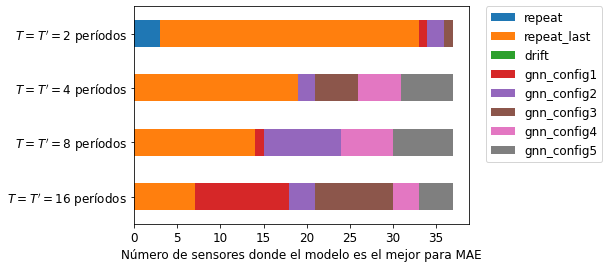

In [124]:
best_mae.columns = best_mae.columns.to_series().apply(lambda x: x.replace("\\", ""))
best_mae.iloc[::-1].plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Número de sensores donde el modelo es el mejor para MAE")
plt.show()

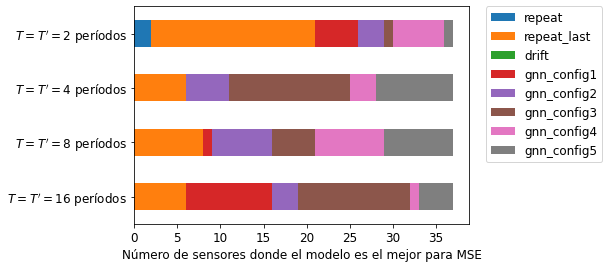

In [125]:
best_mse.columns = best_mse.columns.to_series().apply(lambda x: x.replace("\\", ""))
best_mse.iloc[::-1].plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Número de sensores donde el modelo es el mejor para MSE")
plt.show()

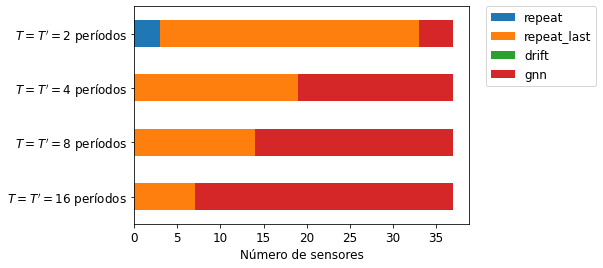

In [126]:
best_mae["gnn"] = best_mae["gnn_config1"] + best_mae["gnn_config2"] +best_mae["gnn_config3"] + best_mae["gnn_config4"] +best_mae["gnn_config5"]
best_mae.iloc[::-1].loc[:, ["repeat", "repeat_last", "drift", "gnn"]].plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Número de sensores")
plt.show()

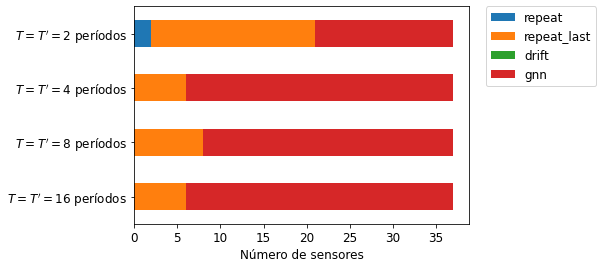

In [127]:
best_mse["gnn"] = best_mse["gnn_config1"] + best_mse["gnn_config2"] +best_mse["gnn_config3"] + best_mse["gnn_config4"] +best_mse["gnn_config5"]
best_mse.iloc[::-1].loc[:, ["repeat", "repeat_last", "drift", "gnn"]].plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Número de sensores")
plt.show()

In [ ]:
short_term_maes_avg.best_model.value_counts()

In [ ]:
pd.DataFrame(short_term_mses_avg)

In [ ]:
def plot_losses(group, loss):
        fig, ax = plt.subplots(len(ids_list), 1, figsize=(10, len(ids_list)), sharex=True)
        if loss == "mae":
                dict_loss = maes
        else:
                dict_loss = mses
        for i, sensor_id in enumerate(ids_list):
                ax[i].set_ylabel(sensor_id)
                for label, df in dict_loss.items():
                        if label not in group:
                                continue
                        df.loc[sensor_id][:-2].hist(ax=ax[i], alpha=0.8, label=label)
        fig.tight_layout()
        plt.legend()
        plt.show()

In [ ]:
plot_losses(linear_regression_models+xgboost, "mae")

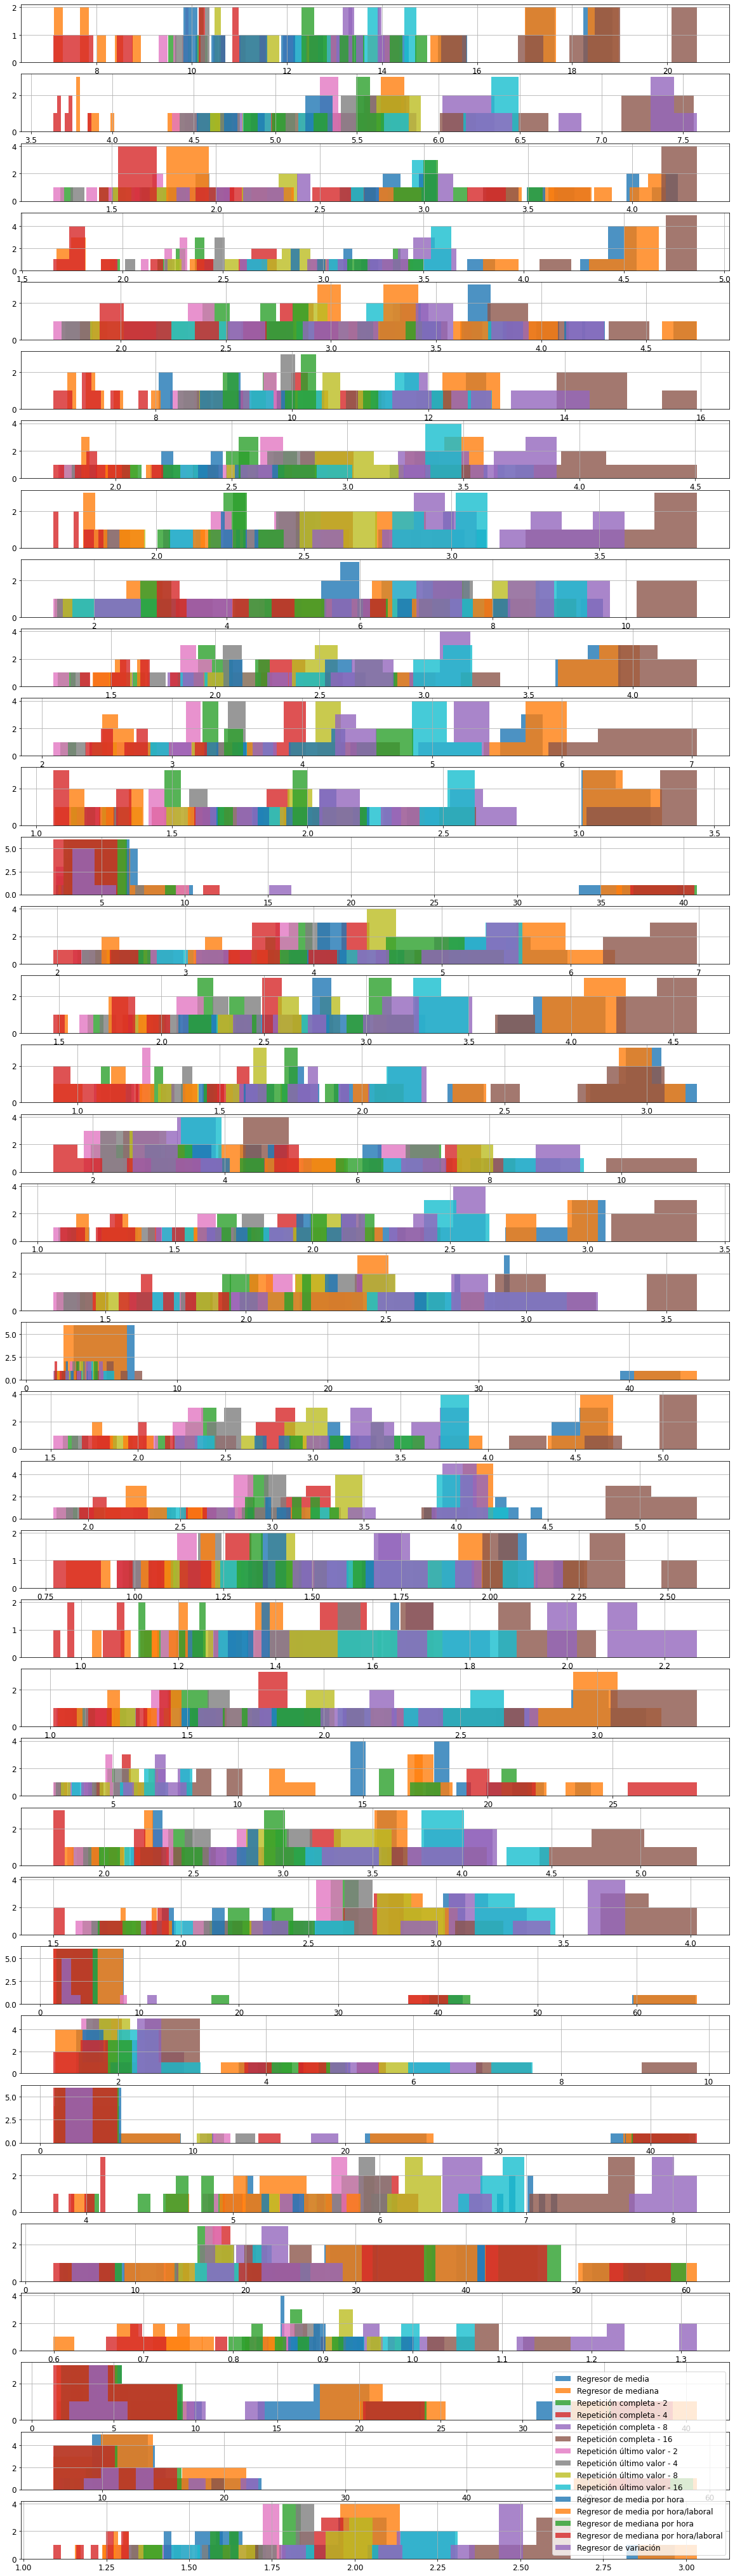

In [55]:
plot_losses(baseline_models, "mae")